## imports

In [1]:
import trackpy as tp
import pims
from skimage import color
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

%matplotlib inline

This is entirely using `http://soft-matter.github.io/trackpy/v0.5.0/tutorial/walkthrough.html`. Go there for a better version of this!

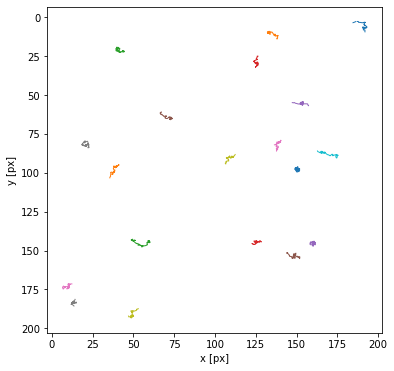

In [34]:
# replace with your own
data_path = 'data_out/2021_Oct_13/06:15:48-PM_50-frames.csv'

tracks = pd.read_csv(data_path)
stable = tp.subtract_drift(tracks, tp.compute_drift(tracks))

fig,ax = plt.subplots(figsize=(6,6))
tp.plot_traj(stable)
ax.set_aspect('equal')
plt.show()

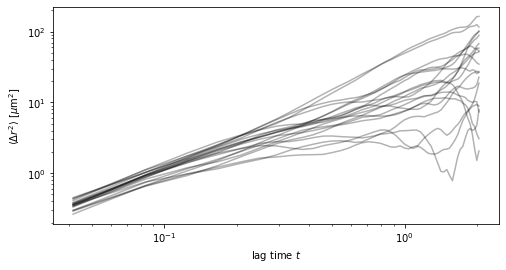

In [45]:
microns_per_pixel = 1
frames_per_second = 24

mean_square_disp = tp.imsd(stable, microns_per_pixel, frames_per_second)
fig,ax = plt.subplots(figsize=(8,4))
ax.plot(mean_square_disp.index, mean_square_disp, 'k-', alpha=.3)
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
ax.set_yscale('log')
ax.set_xscale('log')

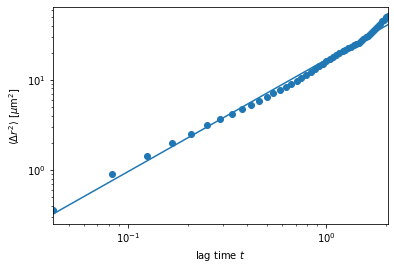

,n,A
msd,1.243596,16.750032


In [52]:
em = tp.emsd(stable, microns_per_pixel, frames_per_second)

fig, ax = plt.subplots()
# ax.plot(em.index, em, 'o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')

tp.utils.fit_powerlaw(em) 
